ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

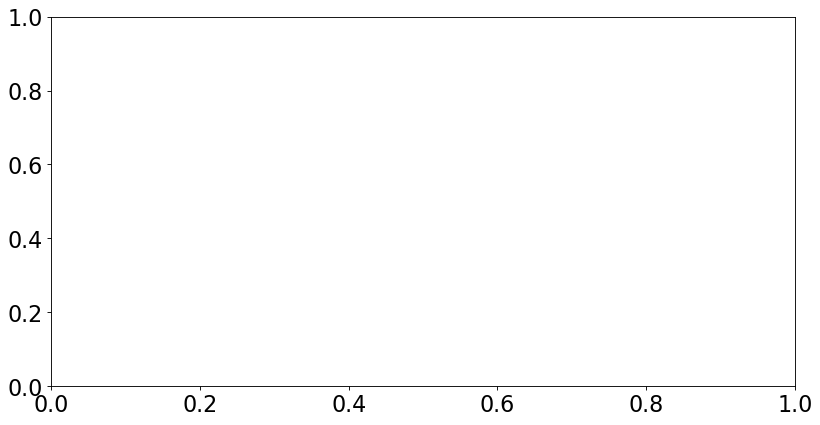

In [1]:
# plot of some of the Legendre polynomials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import lpmv
x = np.arange(-1,1,0.0001)
plt.figure(figsize=(12,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
for l in range(2):
    for m in range(-l,l+1):
        label = "l=" + str(l) + ", m=" + str(m)
        plt.plot(x,lpmv(m,l,x),lw=4,label=label)
plt.title("Associated Lengedre Polynomials",fontsize=16)
plt.legend(fontsize=16);

In [2]:
from scipy import integrate

In [7]:
def aleg(x,l,m):
    return lpmv(m,l,x)
def aleg2(x,l,m):
    return lpmv(m,l,x)**2

In [10]:
integrate.quad(aleg,-1.0,1.0,args=(1,0))[0]

7.03271174002352e-18

In [5]:
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
print(hbar**2*np.pi**2/(2*me*r0**2))
print(hbar**2*np.pi**2/(2*me*r0**2)*6.022e23/1000)

6.024595193922694e-22
0.36280112257802466


In [7]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
n2 = 2
n1 = 1
print(hbar**2/(2*me*r0**2)*6.022e23/1000*(spherical_jn_zero(1,1)**2-spherical_jn_zero(0,1)**2))

0.3793987355167171


In [8]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
print(hbar**2/(2*me*r0**2)*6.022e23/1000*(spherical_jn_zero(1,1)**2))

0.7421998580947418


In [2]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
n2 = 7.725
n1 = 4.493
print(hbar**2/(2*me*r0**2)*6.022e23/1000*(n2**2-n1**2))

1.4515779072387491


In [1]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import spherical_jn
from scipy.special import lpmv
%matplotlib inline
from scipy.optimize import root
    

def spherical_jn_zero(l, n, ngrid=100):
    """Returns nth zero of spherical bessel function of order l
    """
    if l > 0:
        # calculate on a sensible grid
        x = np.linspace(l, l + 2*n*(np.pi * (np.log(l)+1)), ngrid)
        y = spherical_jn(l, x)
    
        # Find m good initial guesses from where y switches sign
        diffs = np.sign(y)[1:] - np.sign(y)[:-1]
        ind0s = np.where(diffs)[0][:n]  # first m times sign of y changes
        x0s = x[ind0s]
    
        def fn(x):
            return spherical_jn(l, x)

        return [root(fn, x0).x[0] for x0 in x0s][-1]
    else:
        return n*np.pi
    
def particle_in_sphere_wf(r,theta,phi,n,l,m):
    denom = spherical_jn_zero(l, n)
    return sph_harm(m, l, phi, theta).real*spherical_jn(l, r*denom)

In [2]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
for l in range(4):
    for n in range(1,5):
        E = spherical_jn_zero(l, n)
        print(l,n,E**2,hbar**2/(2*me*r0**2)*6.022e23/1000*E**2)

0 1 9.869604401089358 0.3628011225780246
0 2 39.47841760435743 1.4512044903120984
0 3 88.82643960980423 3.2652101032022216
0 4 157.91367041742973 5.804817961248394
1 1 20.19072855642663 0.7421998580947418
1 2 59.67951594410929 2.1937855358261524
1 3 118.89986916362645 4.370692507410193
1 4 197.8578111933772 7.273142174154927
2 1 33.21746191426837 1.2210552704989044
2 2 82.71923110149328 3.0407125435646014
2 3 151.85487416406843 5.582100008951502
2 4 240.70290658541617 8.848103851796088
3 1 48.831193643618796 1.7950072921640499
3 2 108.51635883015503 3.9890004909735315
3 3 187.6358383069526 6.897388183676074
3 4 286.40895740534296 10.528232646446401


In [3]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
for l in range(4):
    n = 1
    E1 = spherical_jn_zero(l, n)
    E2 = spherical_jn_zero(l+1, n)
    print(l,l+1,E2**2-E1**2,hbar**2/(2*me*r0**2)*6.022e23/1000*(E2**2-E1**2))

0 1 10.321124155337273 0.3793987355167171
1 2 13.026733357841739 0.4788554124041626
2 3 15.613731729350427 0.5739520216651457
3 4 18.123118281486008 0.6661956639732913


In [5]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
for n in range(1,5):
    l = 0
    E1 = spherical_jn_zero(l, n)
    E2 = spherical_jn_zero(l, n+1)
    print(n,n+1,E2**2-E1**2,hbar**2/(2*me*r0**2)*6.022e23/1000*(E2**2-E1**2))

1 2 29.608813203268074 1.0884033677340739
2 3 49.34802200544679 1.8140056128901232
3 4 69.0872308076255 2.539607858046172
4 5 88.82643960980423 3.2652101032022216


In [6]:
import numpy as np
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
for n in range(1,5):
    l = 1
    E1 = spherical_jn_zero(l, n)
    E2 = spherical_jn_zero(l, n+1)
    print(n,n+1,E2**2-E1**2,hbar**2/(2*me*r0**2)*6.022e23/1000*(E2**2-E1**2))

1 2 39.48878738768266 1.4515856777314107
2 3 59.22035321951716 2.176906971584041
3 4 78.95794202975074 2.902449666744733
4 5 98.69660094233939 3.628031698267848
